In [36]:
import numpy as np
import pandas as pd
import random 
import math
import csv
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm
from sys import maxsize

In [37]:
with open('Gamma_test.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
at=(np.float_(data))
with open('Gamma_train.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
a=(np.float_(data))

xt=at[:,0:2]
yt=at[:,2]
At=np.hstack((xt,np.ones((1000,1))))

N=50
c1=list(range(0,1000))
c2=list(range(1000,2000))
rds1=random.sample(c1,N)
rds2=random.sample(c2,N)

rs1=np.sort(rds1)
rs2=np.sort(rds2)

xnew=np.vstack((a[rs1,0:2],a[rs2,0:2]))
A=np.hstack((xnew,np.ones((2*N,1))))
y=np.concatenate((a[rs1,2],a[rs2,2]))

In [38]:
l=0
W=np.matmul(np.linalg.inv(np.matmul(A.T,A)),np.matmul(A.T,y))
W

array([-0.17115199, -0.14503991,  0.68540117])

## MSE

In [39]:
MSE=np.sum(np.square(yt-np.matmul(At,W)))/1000
MSE

0.41622994944306085

## Number of Misclassifications

In [40]:
WX=np.matmul(At,W.T)
EB=np.matmul(At,W.T)
for i in range(0,1000):
        if WX[i]>0:
            WX[i]=1
        else:
            WX[i]=-1
1000-((WX-yt)==0).sum()

97

In [41]:
y0=y
y0t=yt

for i in range(0,N):
    if y[i]==-1:
        y0[i]=0
        
for i in range(0,1000):
    if yt[i]==-1:
        y0t[i]=0

In [42]:
# epsi=0.0001
# eta=0.0001
# wk=np.array([3,3.5,-1])
# i=0
# wkn=np.array([1000,1500,3500])

# print("Norm",np.dot((wkn-wk),(wkn-wk)))

# while np.dot((wkn-wk),(wkn-wk)) > epsi:
    
#     sum1=0
#     for i in range(0,N):
#         ea=np.dot(wk,A[i,:])
#         h=1/(1+math.exp(-ea))
#         #sum1=sum1+h*h*math.exp(-ea)*(A[i,:].T*(h - y0[i]))
#         sum1=sum1+ (1 / N)* (A[i,:].T*(h - y0[i]))
        
#     wkn = wk
    
#     wk=wk-eta*sum1
#     print("Norm",np.dot((wkn-wk),(wkn-wk)))

In [43]:
# wk

In [44]:
# yr=[]
# for i in range(0,1000):
#     if 1/(1+math.exp(-np.dot(wk,At[i,:])))>0.5:
#         yr.append(1)
#     else:
#         yr.append(0)


In [45]:
# 1000 - ((yr-y0t)==0).sum()

# NEW STUFF


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(A, y)
predicted_classes = model.predict(A)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

C:\Users\range\.julia\conda\3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
parameters[:,2]=parameters[:,2]*2
parameters

array([[-0.7562291 , -1.65444803,  3.31796772]])

In [48]:
accuracy

0.96

In [49]:
yr=[]

for i in range(0,1000):
    if 1/(1+math.exp(-np.dot(parameters,At[i,:])))>0.5:
        yr.append(1)
    else:
        yr.append(0)
1000 - ((yr-y0t)==0).sum()

69

# Plot

In [50]:
xmaxtr = np.amax(a,axis=0)
print(xmaxtr)
xmintr = np.amin(a,axis=0)
print(xmintr)
xmaxts = np.amax(at,axis=0)
print(xmaxts)
xmints = np.amin(at,axis=0)
print(xmints)

[19.8054 17.7682  1.    ]
[ 0.  0. -1.]
[14.6166 19.6762  1.    ]
[0. 0. 0.]


In [51]:
ymaxl = (W[2]+5*W[0])/(-W[1])
yminl = W[2]/(-W[1])
ymaxlo = (parameters[:,2]+3*parameters[:,0])/(-parameters[:,1])
yminlo = parameters[:,2]/(-parameters[:,1])

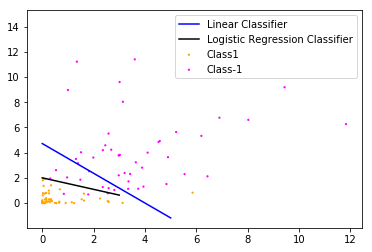

In [52]:
fig,ax = plt.subplots()
ax.scatter(A[0:N,0], A[0:N,1], c='orange', s=5, label='Class1',alpha=1, edgecolors='none')
ax.scatter(A[N:2*N,0], A[N:2*N,1], c='magenta', s=5, label='Class-1',alpha=1, edgecolors='none')
ax.plot(np.array([0,5]),np.array([yminl,ymaxl]),'-b',label='Linear Classifier')
ax.plot(np.array([0,3]),np.array([yminlo,ymaxlo]),'-k',label='Logistic Regression Classifier')
leg = ax.legend();
plt.savefig('Q1_1_50.png')